In [93]:
# In this notebook we cover the following
# A. Color Conversion
# B. Point Operations
# C. Linear Filters
# D. Non Linear Filters
# E. High Pass and Low Pass Filters 
# F. Binary Thresholding
# F. Morphological Operations
# F. Frequency Domain
# G. Pyramids and Wavelets, blending

import cv2
import matplotlib.pyplot as plt
import numpy as np

def show(image, imgtxt = "Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(imgtxt)
    plt.show()


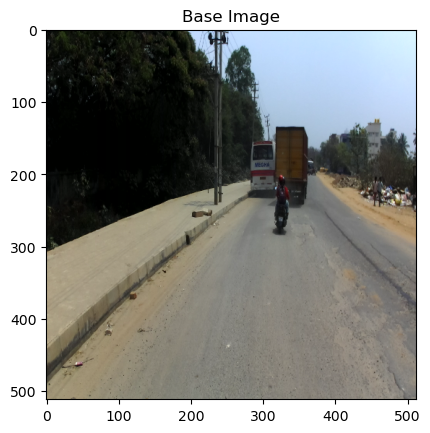

In [94]:
img = cv2.imread("./images/Image_25.png")
show(img, "Base Image")


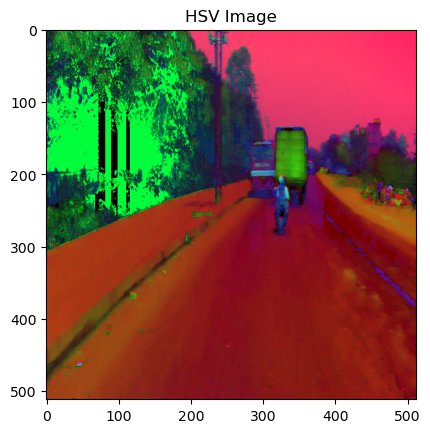

In [95]:
# BGR to HSV colour conversion
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show(hsv_img,"HSV Image")
#show(np.hstack([img, hsv_img]),"HSV Image")


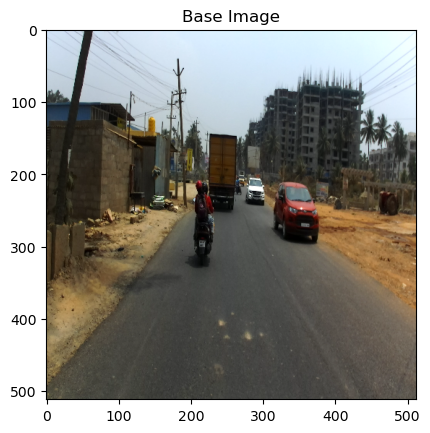

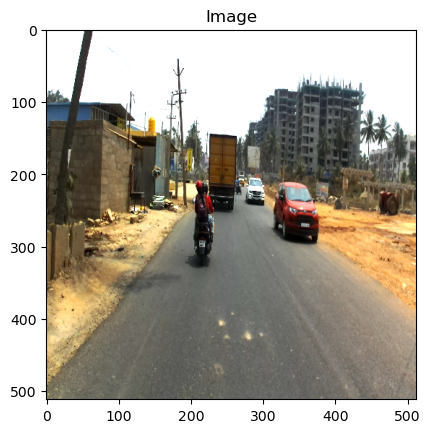

In [96]:
#Image enhancement 
# brightness
img = cv2.imread("./images/Image_75.png")
show(img, "Base Image")
bright_img = cv2.addWeighted(img, 1.5, np.zeros_like(img), 0, 0)
show(bright_img)

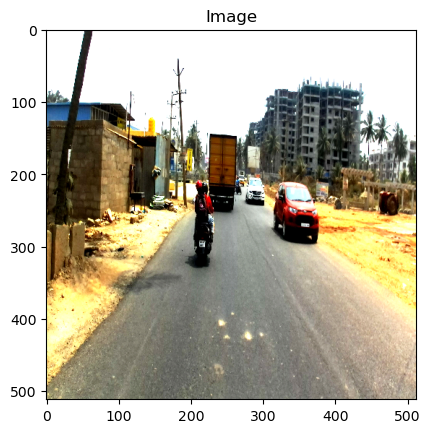

In [97]:
# Contrast
contrast_img = cv2.addWeighted(img, 2.5, np.zeros_like(img), 0, -50)
show(contrast_img)

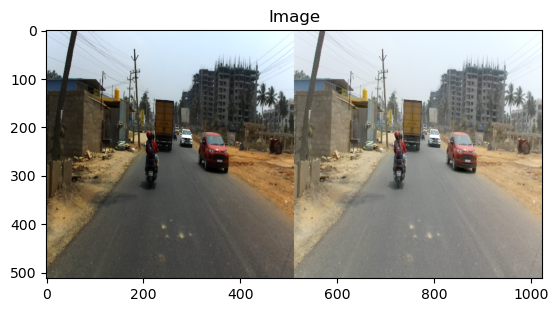

In [98]:
# Gamma correction
#img=img.astype(np.float32)
#gamma_img = cv2.pow(img/255, 1) * 255.0
#show(gamma_img)
gamma=2
invGamma = 1.0 / gamma
table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
gamma_adj = cv2.LUT(img, table)
show(np.hstack([img, gamma_adj]))


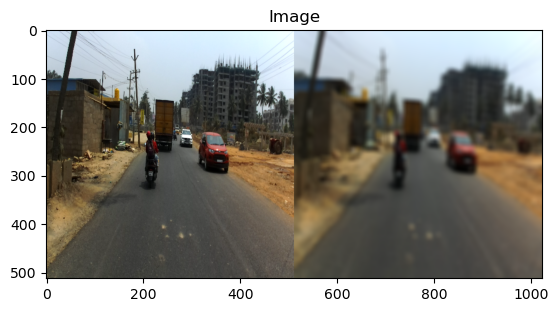

In [99]:
# Smoothing filters
# Gaussian
blurred_img = cv2.GaussianBlur(img, (15, 15), cv2.BORDER_TRANSPARENT )
show(np.hstack([img, blurred_img]))


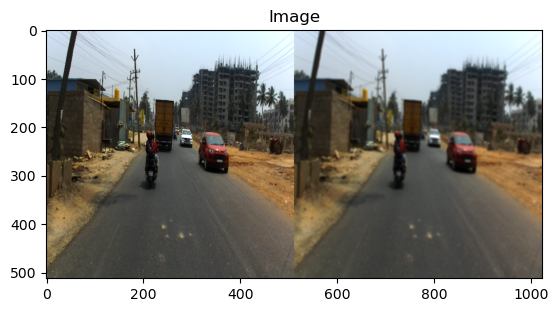

In [100]:
#average
avg_blur_img = cv2.blur(img, (5, 5))
show(np.hstack([img, avg_blur_img]))


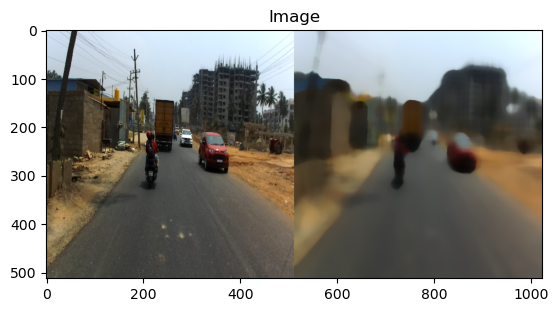

In [101]:
# median
median_blur_img = cv2.medianBlur(img, 25)
show(np.hstack([img, median_blur_img]))


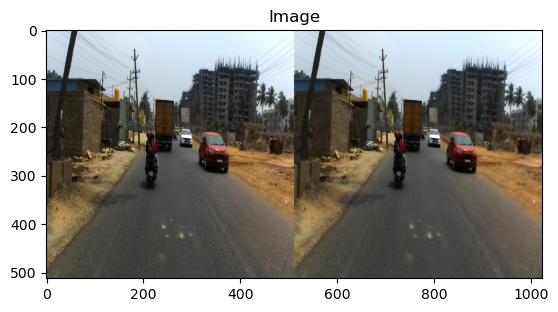

In [102]:
# bilateral
bilateral_img = cv2.bilateralFilter(img, 5, 100, 100)
show(np.hstack([img, bilateral_img]))


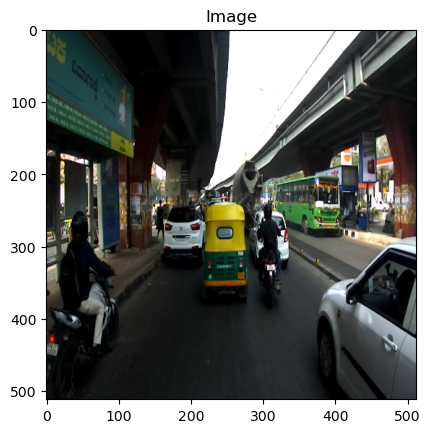

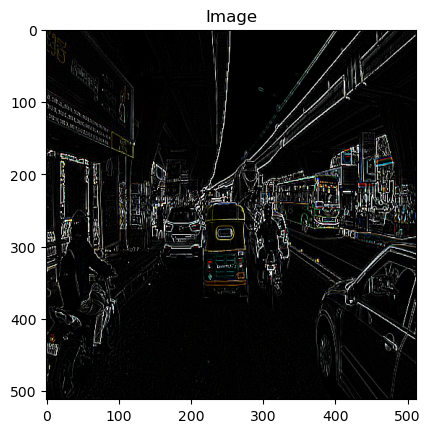

In [103]:

# kernel = np.array([[-1, 0, 1],
#                    [-2, 0, 2],
#                    [-1, 0, 1]])
#
# kernel = np.array([[-1, -2, -1],
#                    [0, 0, 0],
#                    [1, 2, 1]])

#
# # # Sharpen
# kernel = np.array([[0,  0,  -1, 0,  0],
#                    [0,  -1, -2, -1, 0],
#                    [-1, -2, 16, -2, -1],
#                    [0,  -1, -2, -1, 0],
#                    [0,  0,  -1, 0,  0]
#                    ])

# # Emboss
# kernel = np.array([[2, 1, 0],
#                    [1, 0, -1],
#                    [0, -1, -2]])

# # Sharpen
# kernel = np.array([[0, -1, 0],
#                    [-1, 4, -1],
#                    [0, -1, 0]])    
img = cv2.imread("./images/Image_6775.png")
show(img)
#  Edge Detection
kernel = np.array([[-1, -1, -1], 
                    [-1, 8, -1], 
                    [-1, -1, -1]]) 
canvasOutput = cv2.filter2D(src=img, ddepth=-1, kernel=kernel) 
show(canvasOutput)

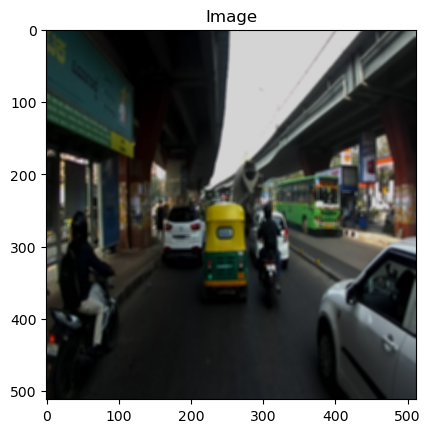

In [104]:
# # Emboss
# kernel = np.array([[2, 1, 0],
#                    [1, 0, -1],
#                    [0, -1, -2]])

# # Sharpen
# kernel = np.array([[0, -1, 0],
#                    [-1, 4, -1],
#                    [0, -1, 0]])  
#  blur
kernel = np.ones((5, 5), np.float32)/30
canvasOutput = cv2.filter2D(src=img, ddepth=-1, kernel=kernel) 
show(canvasOutput)


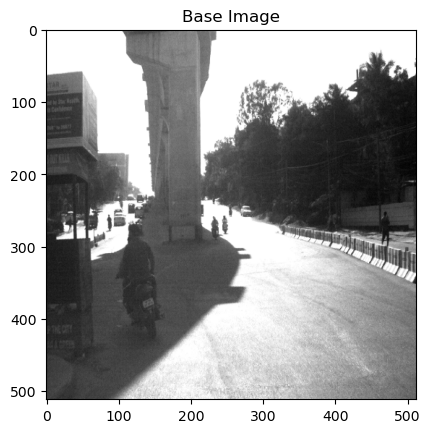

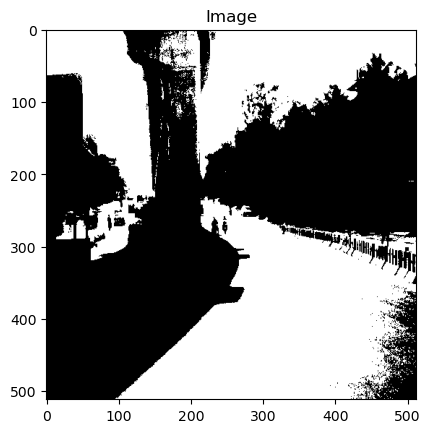

In [105]:
# Thresholding 
# binary 
img = cv2.imread("./images/Image_15.png", cv2.IMREAD_GRAYSCALE)
show(img, "Base Image")
thresh, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
show(binary_img)

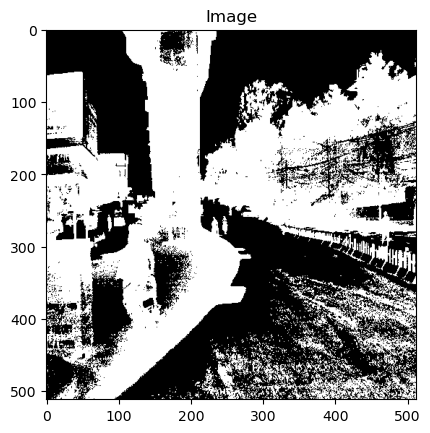

In [106]:
# adaptive
from keras.preprocessing import image
img = image.img_to_array(img, dtype='uint8')
adaptive_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 199, 5)
show(adaptive_img)

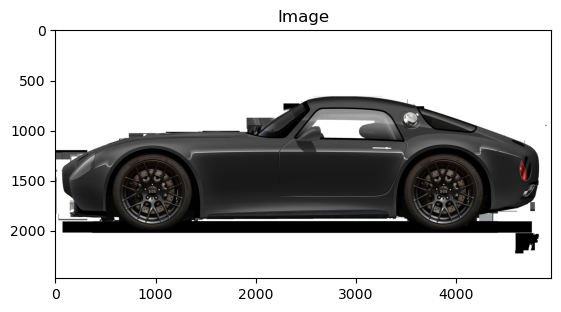

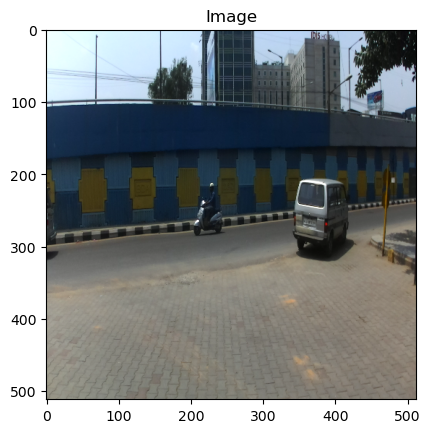

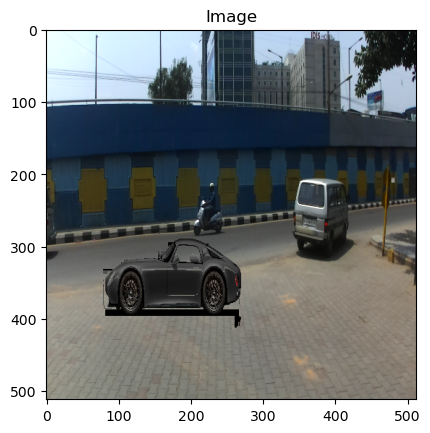

In [186]:
# Masking of image
# Load car and road images
car_image = cv2.imread("./images/car.png")
show(car_image)
road_image = cv2.imread("./images/Image_145.png")
show(road_image)
rows,cols,_ = road_image.shapecar
car_image = cv2.copyMakeBorder(car_image, 3000, 1000, 2000, 6000, cv2.BORDER_CONSTANT, value=[255,255,255,0])
car_image = cv2.resize(car_image, (cols,rows)) 
car_gray = cv2.cvtColor(car_image, cv2.COLOR_BGR2GRAY)
# Threshold car image to create mask
_, car_mask = cv2.threshold(car_gray, 120, 255, cv2.THRESH_BINARY)
# Invert the mask for merging with the road
mask_inv = 255 - car_mask

background = cv2.bitwise_or(road_image, road_image, mask=car_mask) 
foreground = cv2.bitwise_and(car_image, car_image, mask=mask_inv)

# Finally, combine the car and road images
final_image = cv2.add(background,  foreground)
show(final_image)

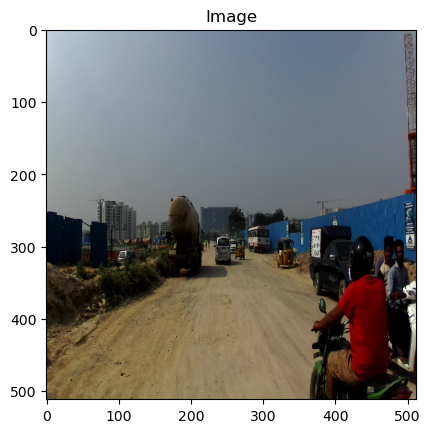

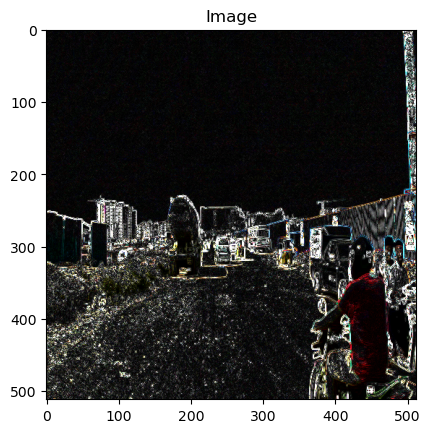

In [108]:
# laplacian
# Sharpening filters 
# Laplacian
img = cv2.imread("./images/Image_620.png")
show(img)
laplacian_img = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
laplacian_img = cv2.convertScaleAbs(laplacian_img)
show(laplacian_img)

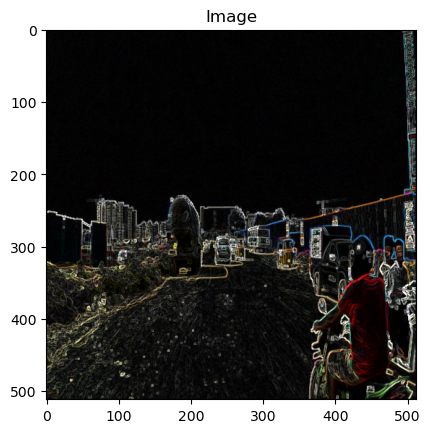

In [109]:
# Sobel
sobelx_img = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely_img = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobelx_img=absx= cv2.convertScaleAbs(sobelx_img)
sobely_img=absy = cv2.convertScaleAbs(sobely_img)
sobelxy_img = cv2.addWeighted(sobelx_img, 0.5, sobely_img, 0.5, 0)
show(sobelxy_img)

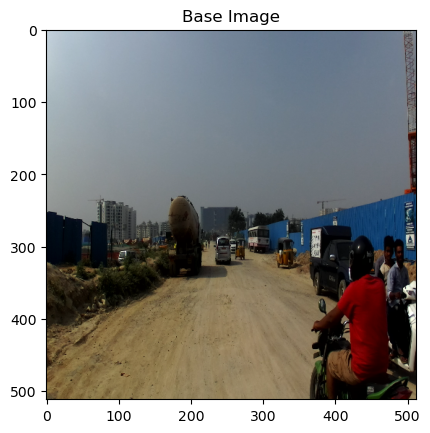

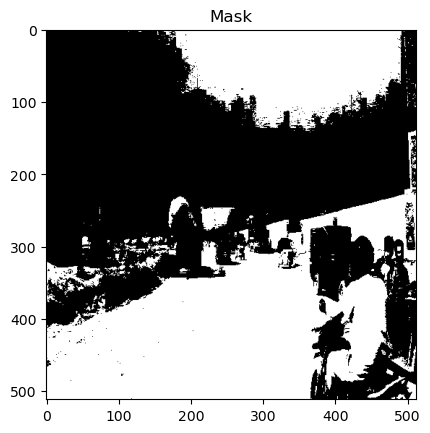

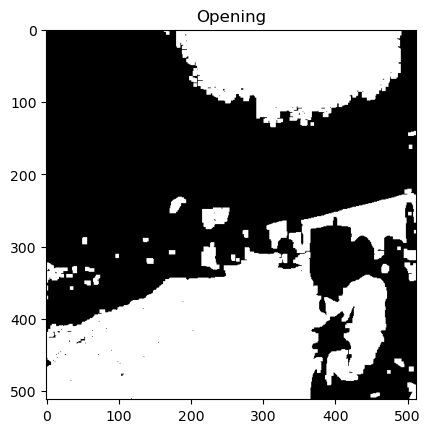

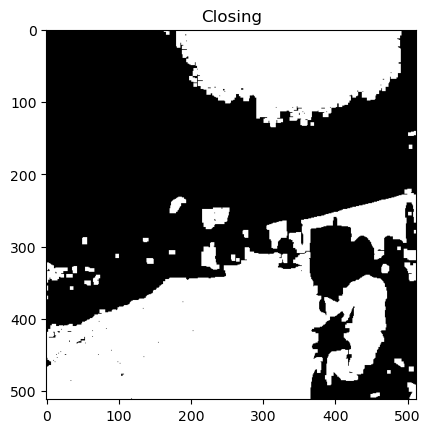

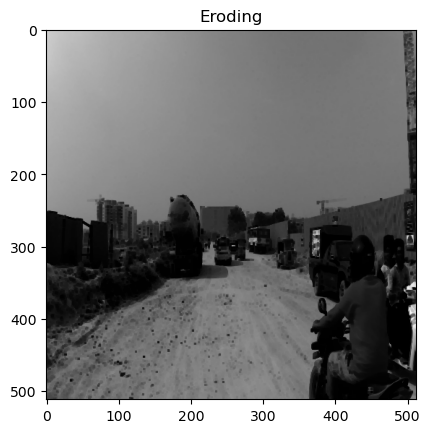

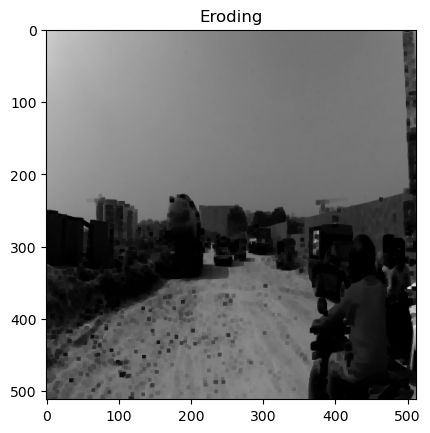

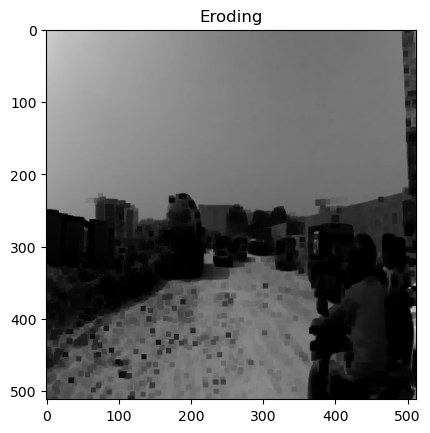

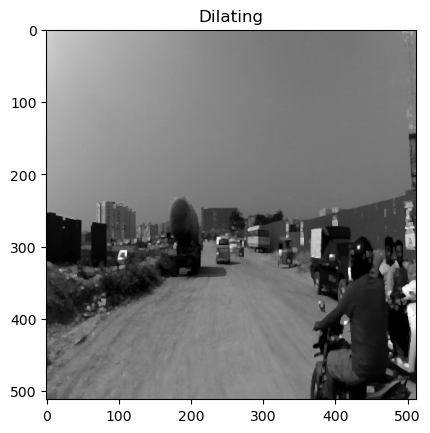

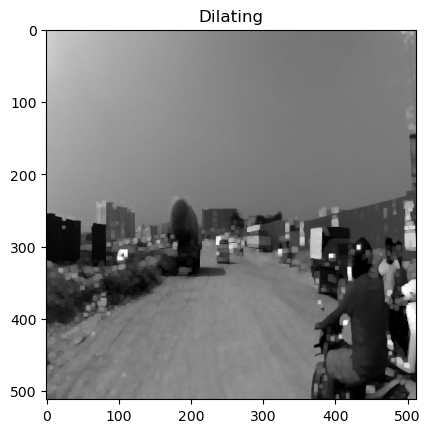

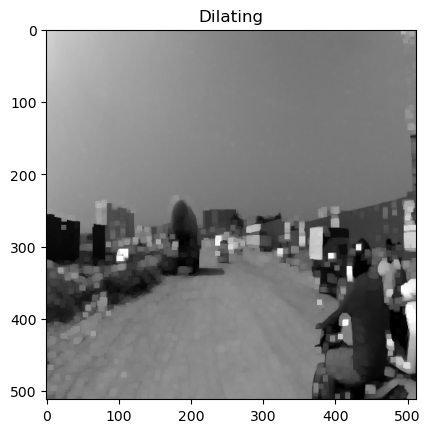

In [110]:
#Morphological Operations
img = cv2.imread("./images/Image_620.png")
show(img, "Base Image")
# Converts to HSV color space, OCV reads colors as BGR  
# frame is converted to hsv 
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 

# defining the range of masking 
blue1 = np.array([0, 50, 50]) 
blue2 = np.array([255, 255, 255]) 

# initializing the mask to be 
# convoluted over input image 
mask = cv2.inRange(hsv, blue1, blue2) 

# passing the bitwise_and over 
# each pixel convoluted 
res = cv2.bitwise_and(img, img, mask = mask) 

# defining the kernel i.e. Structuring element 
kernel = np.ones((5, 5), np.uint8) 

# defining the opening function  
# over the image and structuring element 
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) 
closing = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) 

# The mask and opening operation 
# is shown in the window  
show( mask,'Mask') 
show( opening,'Opening') 
show( opening,'Closing') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply a series of erosions
for i in range(0, 3):
    eroded = cv2.erode(gray.copy(), None, iterations=i + 1)
    show(eroded,"Eroding")
for i in range(0, 3):
    dilation = cv2.dilate(gray.copy(), None, iterations=i + 1)
    show(dilation,"Dilating")    

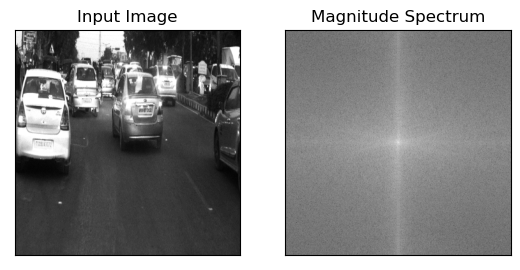

In [111]:
#Frequency domain
img = cv2.imread('./images/Image_1131.png', cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

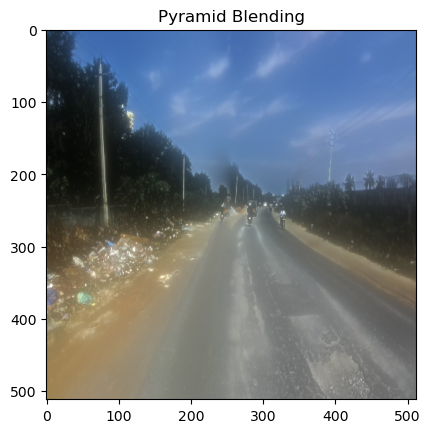

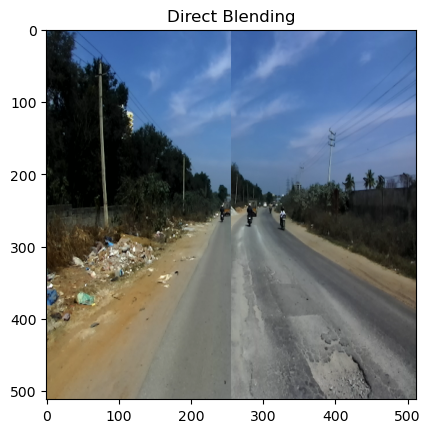

In [112]:
#Pyramids
A = cv2.imread('./images/Image_6556.png')
B = cv2.imread('./images/Image_6555.png')

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)
# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])
# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))
cv2.imwrite('./images/Pyramid_blending2.jpg',ls_)
cv2.imwrite('./images/Direct_blending.jpg',real)
show(ls_,"Pyramid Blending")
show(real,"Direct Blending")

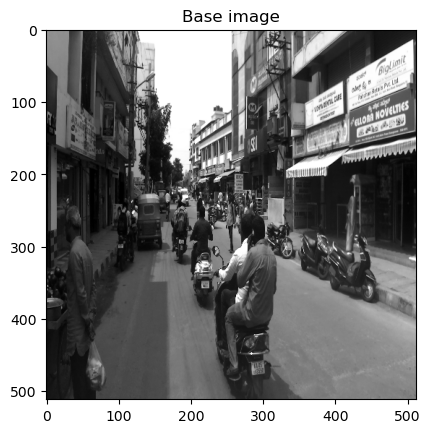

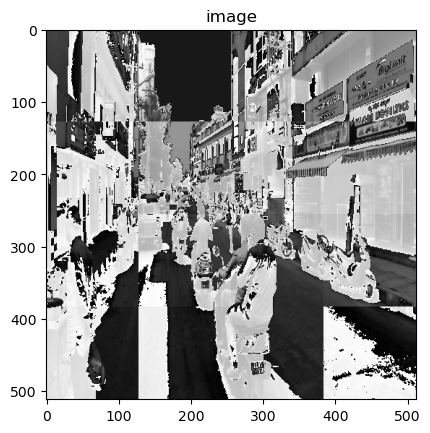

In [113]:
#Wavelets
import pywt

def w2d(img, mode='haar', level=1):
    imArray = cv2.imread(img)
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_BGR2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    #Display result
    show(imArray,'Base image')
    show(imArray_H,'image')

w2d("./images/Image_6990.png",'db1',7)

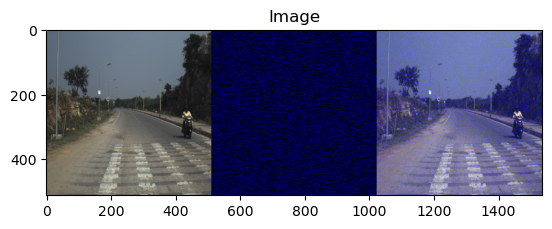

In [114]:
# Excercise : Remove the noise added below by smoothening the image

# Load the image
img = cv2.imread('./images/Image_6658.png')

# Generate random Gaussian noise
mean = 0
stddev = 180
noise = np.zeros(img.shape,dtype=np.uint8)
cv2.randn(noise, mean, stddev)

# Add noise to image
noisy_img = cv2.add(img, noise)
# Save noisy image
cv2.imwrite('./images/guassian_noisy_img.png', noisy_img)
show(np.hstack([img,noise, noisy_img]))



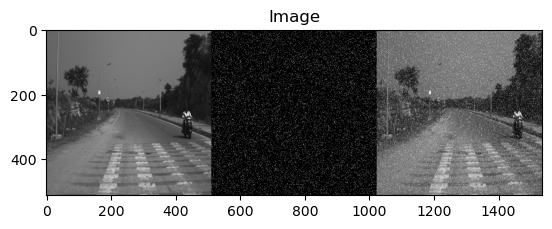

In [115]:
# Load the image
img = cv2.imread('./images/Image_6658.png', 
                 cv2.IMREAD_GRAYSCALE)

imp_noise=np.zeros(img.shape,dtype=np.uint8)
cv2.randu(imp_noise,0,255)
imp_noise=cv2.threshold(imp_noise,240,255,cv2.THRESH_BINARY)[1]

in_img=cv2.add(img,imp_noise)
# Save noisy image
cv2.imwrite('./images/saltpepper_noisy_img.png', noisy_img)
show(np.hstack([img,imp_noise, in_img]))
